In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
import scipy.sparse as sp

In [2]:
def F_in_out(a):
    size = a.shape[0]
    out_degree = np.array(a.sum(axis=0))[0]
    out_degree[out_degree == 0] = 1

    in_degree = np.array(a.sum(axis=1))[:, 0]
    in_degree[in_degree == 0] = 1

    # sparse implementation
    a = sp.csr_matrix(a)
    A_in = sp.csr_matrix(np.zeros((size, size)))
    A_out = sp.csr_matrix(np.zeros((size, size)))
    for k in range(size):
        A_in += np.dot(a[k, :].T, a[k, :])/out_degree[k]
        A_out += np.dot(a[:,k], a[:,k].T)/in_degree[k]

    A_in = A_in.tocoo()
    A_out = A_out.tocoo()
    
    return [A_in, A_out]

In [3]:
def plot_DGCN(A):
    P = F_in_out(A)
    A = A.toarray()

    plt.figure(figsize=(20, 5))
    plt.subplot(141)
    plt.imshow(A)
    plt.title('A')
    plt.subplot(142)
    plt.imshow(A + A.T)
    plt.title('A + A.T')
    plt.subplot(143)
    a = P[0].toarray()

    # set the diag as zero for better visualization if needed
    np.fill_diagonal(a, 0)
    plt.imshow(a)
    plt.title('DGCN high order 1')
    plt.subplot(144)
    a = P[1].toarray()

    # set the diag as zero for better visualization if needed
    np.fill_diagonal(a, 0)
    plt.imshow(a)
    plt.title('DGCN high order 2')

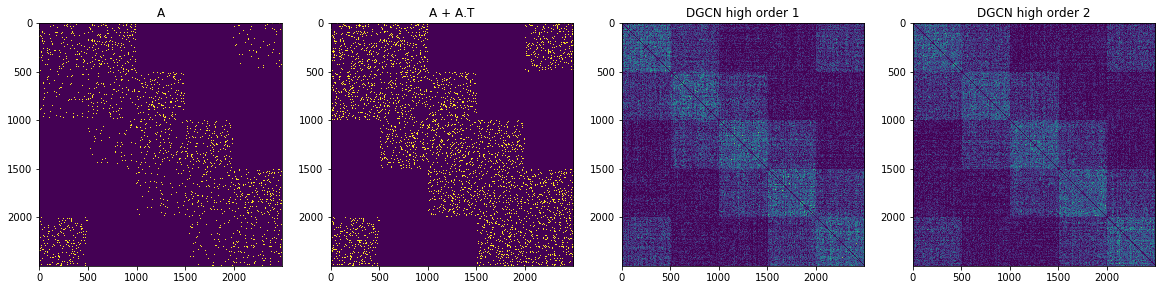

In [5]:
data = pk.load(open('../dataset/data/tmp/syn/cyclic75Seed10.pk','rb'))
size = data.y.shape[0]
if data.edge_weight is not None:
    a = sp.coo_matrix((data.edge_weight, data.edge_index), shape=(size, size)).tocsc()
else:
    a = sp.coo_matrix((np.ones(len(data.edge_index[0])), data.edge_index), shape=(size, size)).tocsc()
plot_DGCN(a)